In [148]:
import importlib
import eloR as elo
importlib.reload(elo)


<module 'eloR' from 'c:\\Users\\leomo\\Desktop\\sailing-rankings\\src\\eloR.py'>

In [149]:
import pandas as pd
df = pd.read_excel('../data/ajustado_single_classes.xlsx')
#df.head()

In [180]:
import warnings
warnings.filterwarnings('ignore')

In [181]:
ilca = df[df["Classe Vela"] == "Ilca 7"]
ilca["Ano"] = ilca["Nome Competição"].str.extract(r"(\d{4})").astype(int)
ilca["Posição Geral"] = ilca["Posição Geral"].astype(int)

In [311]:
#get the position in each unique competition of KONTIDES PAVLOS
kp = ilca[ilca["Nome Competidor" ] == "CYRILL KNECHT"]
kp.groupby("Nome Competição")["Posição Geral"].min().sort_values()

Nome Competição
World Championship 2016              97
Trofeo S.A.R Princesa Sofia 2017    132
World Championship 2017             139
Trofeo S.A.R Princesa Sofia 2015    143
World Championship 2015             148
Trofeo S.A.R Princesa Sofia 2016    152
Trofeo S.A.R Princesa Sofia 2018    159
Trofeo S.A.R Princesa Sofia 2019    161
Name: Posição Geral, dtype: int32

In [176]:
#group by pair "Nome Competidor" and "Nome Competição" and add year

grouped_ilca = ilca.groupby(["Ano","Nome Competição", "Nome Competidor", ]).agg({"Posição Geral": "min"}
    ).sort_values(by=["Ano", "Nome Competição", "Posição Geral"], ascending=True).reset_index()

#grouped_ilca.head(10)

In [189]:
data = []
for ano in grouped_ilca["Ano"].unique():
    for comp in grouped_ilca[grouped_ilca["Ano"] == ano]["Nome Competição"].unique():
        results = grouped_ilca[(grouped_ilca["Ano"] == ano) & (grouped_ilca["Nome Competição"] == comp)]["Posição Geral"].values
        names = grouped_ilca[(grouped_ilca["Ano"] == ano) & (grouped_ilca["Nome Competição"] == comp)]["Nome Competidor"].values
        data.append([results, names])

In [218]:
# unique names
ratings = dict()
#key = name, value = 1200
names = grouped_ilca["Nome Competidor"].unique()
for name in names:
    ratings[name] = 1200

type(ratings)

dict

In [242]:
import models
importlib.reload(models)

<module 'models' from 'c:\\Users\\leomo\\Desktop\\sailing-rankings\\src\\models.py'>

In [244]:
elo = models.EloRating(ratings, k=1024)
elo.k_fold(data, ratings=ratings)

7553.806871593393

In [309]:
elo = models.EloRating(ratings, k=128)
elo.fit(data)
RateDf = pd.DataFrame.from_dict(elo.ratings, orient='index', columns=['Rating'])

In [310]:
RateDf.sort_values(by=['Rating'], ascending=False)

,Rating
KONTIDES PAVLOS,1675.801849
PHILIPP BUHL,1665.975788
TONCI STIPANOVIC,1656.533133
MICHAEL BECKETT,1645.478145
HANSON ELLIOT,1640.133498
...,...
JUAN IGNACIO PEREZ,1030.063811
CLEMENS KUEBBER,1028.823339
PRIKRYL BENJAMIN,1020.705854
MARTIN ARUJA,1015.452511


In [ ]:
elo.fit(data)


In [253]:
with open("error_list.txt", "a") as f:
    for i in range(2, 1024, 2):
        print(f"K = {i}")
        elo = models.EloRating(ratings, k=i)
        error = elo.k_fold(data, ratings=ratings)
        f.write(f"{i},{error}\n")


K = 2
K = 4
K = 6
K = 8
K = 10
K = 12
K = 14
K = 16
K = 18
K = 20
K = 22
K = 24
K = 26
K = 28
K = 30
K = 32
K = 34
K = 36
K = 38
K = 40
K = 42
K = 44
K = 46
K = 48
K = 50
K = 52
K = 54
K = 56
K = 58
K = 60
K = 62
K = 64
K = 66
K = 68
K = 70
K = 72
K = 74
K = 76
K = 78
K = 80
K = 82
K = 84
K = 86
K = 88
K = 90
K = 92
K = 94
K = 96
K = 98
K = 100
K = 102
K = 104
K = 106
K = 108
K = 110
K = 112
K = 114
K = 116
K = 118
K = 120
K = 122
K = 124
K = 126
K = 128
K = 130
K = 132
K = 134
K = 136
K = 138
K = 140
K = 142
K = 144
K = 146
K = 148
K = 150
K = 152
K = 154
K = 156
K = 158
K = 160
K = 162
K = 164
K = 166
K = 168
K = 170
K = 172
K = 174
K = 176
K = 178
K = 180
K = 182
K = 184
K = 186
K = 188
K = 190
K = 192
K = 194
K = 196
K = 198
K = 200
K = 202
K = 204
K = 206
K = 208
K = 210
K = 212
K = 214
K = 216
K = 218
K = 220
K = 222
K = 224
K = 226
K = 228
K = 230
K = 232
K = 234
K = 236
K = 238
K = 240
K = 242
K = 244
K = 246
K = 248
K = 250
K = 252
K = 254
K = 256
K = 258
K = 260
K = 262
K = 2

In [271]:
with open("error_list.txt", "a") as f:
    for i in range(20000, 20100, 20):
        print(f"K = {i}")
        elo = models.EloRating(ratings, k=i)
        error = elo.k_fold(data, ratings=ratings)
        f.write(f"{i},{error}\n")


K = 20000
K = 20020
K = 20040
K = 20060
K = 20080


In [272]:
#read from txt

error_list = []
with open("error_list.txt", "r") as f:
    for line in f:
        #converts index 0 to int and index 1 to float
        error_list.append([int(line.split(",")[0]), float(line.split(",")[1])])

In [263]:
error_list 

[[2, 8639.838918859728],
 [4, 8548.171715836881],
 [6, 8459.473512274704],
 [8, 8373.752646704539],
 [10, 8290.986468836698],
 [12, 8211.127905598492],
 [14, 8134.111222137973],
 [16, 8059.856934167561],
 [18, 7988.2758978889615],
 [20, 7919.272645304067],
 [22, 7852.748053362938],
 [24, 7788.601441763901],
 [26, 7726.732191621672],
 [28, 7667.0409695554235],
 [30, 7609.430631716246],
 [32, 7553.806871593393],
 [34, 7500.078665139111],
 [36, 7448.158557383303],
 [38, 7397.962826502499],
 [40, 7349.41155431213],
 [42, 7302.428626303036],
 [44, 7256.9416795268135],
 [46, 7212.882012713241],
 [48, 7170.184469841936],
 [50, 7128.787305856561],
 [52, 7088.6320411991455],
 [54, 7049.663310245532],
 [56, 7011.828707472596],
 [58, 6975.078634201343],
 [60, 6939.3661479976145],
 [62, 6904.6468162134615],
 [64, 6870.878574696203],
 [66, 6838.021592337279],
 [68, 6806.0381418660345],
 [70, 6774.892477089236],
 [72, 6744.55071662693],
 [74, 6714.980734081633],
 [76, 6686.15205449903],
 [78, 6658.0

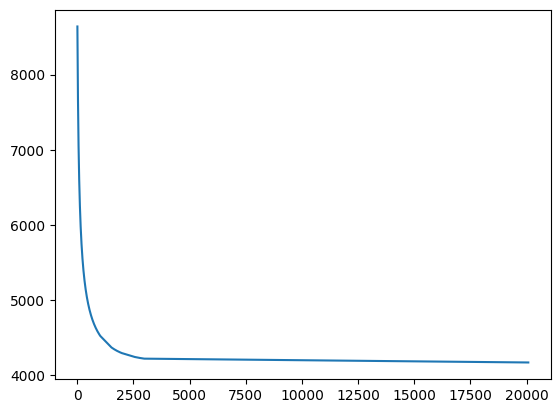

In [273]:
#plots errorlist
import matplotlib.pyplot as plt
plt.plot([i[0] for i in error_list], [i[1] for i in error_list])
plt.show()


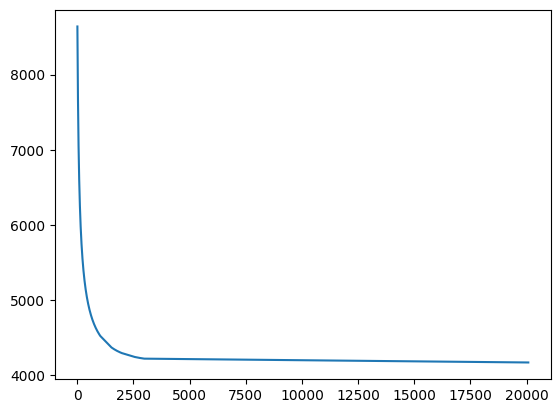

In [286]:
#now log
import math
plt.plot([i[0] for i in error_list], [(i[1]) for i in error_list])

In [289]:
importlib.reload(models)

<module 'models' from 'c:\\Users\\leomo\\Desktop\\sailing-rankings\\src\\models.py'>

In [294]:
#implementing glicko
#rd vector
rd = [350 for i in range(len(ratings))]
#volatility vector
vol = [0.06 for i in range(len(ratings))]
#tau
tau = 0.5

glicko = models.GlickoRating(ratings,rd = rd, vol = vol, tau = tau)
glicko.k_fold(data, ratings=ratings, rd=rd, vol=vol)


TypeError: list indices must be integers or slices, not str

In [293]:
glicko = models.GlickoRating(ratings, tau=0.5,  rd=200, vol=0.06)
glicko.k_fold(data, ratings=ratings, rd=200, vol=0.06)

TypeError: 'int' object is not subscriptable

In [234]:
ratings
elo = models.EloRating(ratings, k=100)
#elo.fit(data)
#elo.ratings


{'TOM BURTON': 1200,
 'NICK THOMPSON': 1200,
 'ROBERT SCHEIDT': 1200,
 'JESPER STALHEIM': 1200,
 'RUTGER VAN SCHAARDENBURG': 1200,
 'NICHOLAS HEINER': 1200,
 'TONCI STIPANOVIC': 1200,
 'CHARLIE BUCKINGHAM': 1200,
 'ANDY MALONEY': 1200,
 'JUAN IGNACIO MAEGLI': 1200,
 'RAMMO KARL-MARTIN': 1200,
 'THOMAS SAUNDERS': 1200,
 'MATHIAS MOLLATT': 1200,
 'SAM MEECH': 1200,
 'PHILIPP BUHL': 1200,
 'KRISTIAN RUTH': 1200,
 'MATT WEARN': 1200,
 'JULIO ALSOGARAY': 1200,
 'MICHAEL BULLOT': 1200,
 'FRANCESCO MARRAI': 1200,
 'JEAN-BAPTISTE BERNAZ': 1200,
 'RYAN PALK': 1200,
 'KONTIDES PAVLOS': 1200,
 'KACPER ZIEMINSKI': 1200,
 'DUKIC MILIVOJ': 1200,
 'ELLIOTT LUKE': 1200,
 'GIOVANNI COCCOLUTO': 1200,
 'BRUNO FONTES': 1200,
 'DANIEL MIHELIC': 1200,
 'WANNES VAN LAER': 1200,
 'FILIP JURISIC': 1200,
 'COLIN CHENG': 1200,
 'ALESSIO SPADONI': 1200,
 'MITCHELL KENNEDY': 1200,
 'ROBERT DAVIS': 1200,
 'HANSON ELLIOT': 1200,
 'ALEX MILLS BARTON': 1200,
 'ENRICO STRAZZERA': 1200,
 'ANTONIOS BOUGIOURIS': 1200,
 'S

In [195]:
dictio = {"name": [], "rating": []}
n = "name"
dictio[n]

[]

In [183]:
1 / (1 + 10 ** ((1000 - 800) / 400))

0.2402530733520421

In [185]:
a = [1,2,3,4,5,6,7,8,9,10]
a[2]

3

In [ ]:
for ano in grouped_ilca["Ano"].unique():
    for comp in grouped_ilca[grouped_ilca["Ano"] == ano]["Nome Competição"].unique():
        results = grouped_ilca[(grouped_ilca["Ano"] == ano) & (grouped_ilca["Nome Competição"] == comp)]["Posição Geral"].values
        ratings = grouped_ilca[(grouped_ilca["Ano"] == ano) & (grouped_ilca["Nome Competição"] == comp)]["elo"].values
        names = grouped_ilca[(grouped_ilca["Ano"] == ano) & (grouped_ilca["Nome Competição"] == comp)]["Nome Competidor"].values

        new_ratings = elo.calc_elo_vector(ratings, results, k=100, normalize=True, inverse_k=False)
        #add the elo change to all the competitors every time their name appears
        for i, name in enumerate(names):
            grouped_ilca.loc[(grouped_ilca["Nome Competidor"] == name), "elo"] += new_ratings[i]


In [ ]:
#show competitor elo pair and race count
grouped_ilca_count = grouped_ilca.groupby(["Nome Competidor"]).agg({"elo": "max", "Posição Geral": "count"})
grouped_ilca_count.sort_values(by="elo", ascending=False).head(20)

,elo,Posição Geral
Nome Competidor,,
MATT WEARN,2217.232378,19
KONTIDES PAVLOS,2150.906235,21
TOM BURTON,2111.249932,12
PHILIPP BUHL,2072.704192,21
SAM MEECH,2058.798735,11
NICK THOMPSON,2033.464856,13
HANSON ELLIOT,2022.979179,20
MICHAEL BECKETT,2012.569318,21
TONCI STIPANOVIC,1987.696348,22


In [ ]:
grouped_ilca_count.sort_values(by="elo", ascending=False).tail(20)

,elo,Posição Geral
Nome Competidor,,
VALERIO CASSANMAGNAGO,-3266.705324,4
PRIKRYL BENJAMIN,-3382.659256,5
JANULIONIS RADVILAS,-3436.680630,6
ANDREAS KRABBE-CHRISTENSEN,-3447.827000,8
KARK WILHELM,-3487.314983,16
MARIO PLOMER QUIROGA,-3722.768663,10
FLORES MARTIN GUILLERMO,-3829.936223,7
AGUSTIN VIDAL,-3991.208478,20
JOSHUA HIGGINS,-4430.429861,6


In [ ]:
#write to a txt file
grouped_ilca_count.sort_values(by="elo", ascending=False).to_csv("../data/ilca7_elo.txt", sep="\t")

sera que tem problema as competicoes nao terem os mesmos competidores pra cross validation?

In [73]:
def calc_elo_pair(rating_a, rating_b, result, k=10):
    expected_a = 1 / (1 + 10 ** ((rating_b - rating_a) / 400))
    expected_b = 1 / (1 + 10 ** ((rating_a - rating_b) / 400))

    change_a = k * (result - expected_a)
    change_b = k * (expected_b - result)

    return change_a, change_b

In [78]:
calc_elo_pair(1000,800,1,k=20)

(4.805061467040844, -15.19493853295916)

In [ ]:
#to test out models we will implement a leave one out cross validation
#to do so we will create a function that will take a dataframe and a model and will return a error metric
#we will leave one competition out and train the model with the rest of the data

def k_fold(data, model):
    

In [63]:
import importlib
import eloR as elo
importlib.reload(elo)


<module 'eloR' from 'c:\\Users\\leomo\\Desktop\\New folder\\eloR.py'>